## install library yang dibutuhkan

In [ ]:
!pip install Sastrawi -q
!pip install torch -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.3 MB/s eta 0:00:00


## import library

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from tqdm.auto import tqdm
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
# Remove AdamW from transformers import
from transformers import BertTokenizer, BertForSequenceClassification, get_scheduler
from torch.utils.data import DataLoader, Dataset
from google.colab import drive
# Import AdamW from torch.optim
from torch.optim import AdamW

## Load dan Read Dataset

In [ ]:
data = pd.read_csv('/content/dataset_bitha.csv')
data.head()

,full_text,created_at,username
0,intinya ikut pendidikan masuk barak militer in...,Thu Jun 05 09:10:43 +0000 2025,NaN
1,@tempodotco mulai deh dikit-dikit barak. anak ...,Thu Jun 05 09:04:37 +0000 2025,NaN
2,Joon beneran udah kaga sabaran njir mau cepet²...,Thu Jun 05 09:03:05 +0000 2025,NaN
3,Dedi Mulyadi: Siswa Melanggar Jam Malam akan D...,Thu Jun 05 09:00:00 +0000 2025,NaN
4,@NashuhaAlza @b1ru_4 Halahhh aku mah kormasit ...,Thu Jun 05 08:52:19 +0000 2025,NaN


## prepoccessing data

In [ ]:
data['full_text'] = data['full_text'].str.lower()

In [ ]:
import pandas as pd
import re

# Load the CSV file
file_path = '/content/dataset_bitha.csv'
df = pd.read_csv(file_path)

# Load the Excel file containing the normalization dictionary
normalization_file_path = '/content/text.xlsx'
normalization_df = pd.read_excel(normalization_file_path)

# Convert the normalization dataframe to a dictionary
normalization_dict = pd.Series(normalization_df.formal.values, index=normalization_df.slang).to_dict()

# Function to clean and normalize text using the normalization dictionary
def clean_and_normalize_text(text, normalization_dict):
    # Remove emojis and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove excessive whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert text to lowercase for normalization
    text = text.lower()
    # Replace slang or informal words with standard words using the normalization dictionary
    words = text.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Apply the clean_and_normalize_text function to the 'Comment' column using the normalization dictionary
df['full_text'] = df['full_text'].apply(lambda x: clean_and_normalize_text(x, normalization_dict))

# Save the cleaned and normalized DataFrame to a new CSV file
cleaned_normalized_file_path = 'data_cleaned_normalized.csv'
df.to_csv(cleaned_normalized_file_path, index=False)

print(f"Cleaned and normalized file saved to {cleaned_normalized_file_path}")


Cleaned and normalized file saved to data_cleaned_normalized.csv


## labeling using roberta-indonesian

In [ ]:
import pandas as pd
from transformers import pipeline

# Load data
data = pd.read_csv("/content/data_cleaned_normalized.csv")

# Load classifier
classifier = pipeline("text-classification", model="w11wo/indonesian-roberta-base-sentiment-classifier")

# Prediksi
results = classifier(data["full_text"].tolist(), truncation=True, max_length=256)

# Pemetaan label
label_map = {
    'negative': 0,
    'neutral': 2,
    'positive': 1
}

# Simpan ke dataframe
data["Label"] = [label_map[result["label"].lower()] for result in results]

# Simpan ke file
data.to_csv("new.csv", index=False)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


## cek jumlah label

In [ ]:
# Mapping label ke nama sentimen
label_map = {0: 'Negatif', 1: 'Positif', 2: 'Netral'}
data['sentimen'] = data['Label'].map(label_map)

# Menampilkan jumlah masing-masing sentimen
sentimen_count = data['sentimen'].value_counts()
print(sentimen_count)

sentimen
Netral     616
Negatif    525
Positif     53
Name: count, dtype: int64


In [ ]:
data.head()

,full_text,created_at,username,Label,sentimen
0,intinya ikut pendidikan masuk barak militer in...,Thu Jun 05 09:10:43 +0000 2025,NaN,0,Negatif
1,tempodotco mulai deh dikitdikit barak anak sek...,Thu Jun 05 09:04:37 +0000 2025,NaN,0,Negatif
2,joon beneran sudah tidak sabaran anjing mau ce...,Thu Jun 05 09:03:05 +0000 2025,NaN,0,Negatif
3,dedi mulyadi siswa melanggar jam malam akan di...,Thu Jun 05 09:00:00 +0000 2025,NaN,2,Netral
4,nashuhaalza b1ru_4 halahhh aku mah kormasit sp...,Thu Jun 05 08:52:19 +0000 2025,NaN,0,Negatif


## smote data (balanced data)

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
import logging

# Setup logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[logging.StreamHandler()]
)
logger = logging.getLogger(__name__)

def oversample_data(input_file, output_file):
    """Balance dataset with SMOTE on TF-IDF vectors,
       then map back to original text to avoid synthetic text artifacts."""
    logger.info("Loading labeled data...")
    df = pd.read_csv(input_file)

    # Clean data
    df = df.dropna(subset=['full_text'])
    df = df[df['full_text'].str.strip().astype(bool)]
    logger.info(f"Initial class distribution:\n{df['Label'].value_counts()}")

    # Encode labels
    label2id = {label: idx for idx, label in enumerate(sorted(df['Label'].unique()))}
    id2label = {v: k for k, v in label2id.items()}
    y = df['Label'].map(label2id).values

    # TF-IDF vectorization
    tfidf = TfidfVectorizer(min_df=2, ngram_range=(1,2), max_features=20000)
    X_tfidf = tfidf.fit_transform(df['full_text'])

    # SMOTE on TF-IDF vectors
    smote = SMOTE(random_state=42, k_neighbors=min(5, df['Label'].value_counts().min()-1))
    X_res, y_res = smote.fit_resample(X_tfidf, y)

    # Map synthetic TF-IDF rows back to closest original text
    from sklearn.metrics.pairwise import cosine_similarity
    synthetic_indices = []
    for idx, vec in enumerate(X_res[len(df):]):
        sims = cosine_similarity(vec, X_tfidf)[0]
        best_idx = sims.argmax()
        synthetic_indices.append(best_idx)

    # Build balanced DataFrame
    balanced_df = pd.concat([
        df,                     # original
        df.iloc[synthetic_indices].reset_index(drop=True)  # duplicated
    ], ignore_index=True)

    # Ensure exact balance
    balanced_df = balanced_df.groupby('Label', group_keys=False)\
                             .apply(lambda x: x.sample(616, replace=True, random_state=42))

    # Shuffle
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

    balanced_df.to_csv(output_file, index=False)
    logger.info(f"Balanced data saved to: {output_file}")
    logger.info(f"Final class distribution:\n{balanced_df['Label'].value_counts()}")
    return balanced_df

if __name__ == "__main__":
    input_file = "new.csv"
    output_file = "new_smote.csv"
    oversample_data(input_file, output_file)

/tmp/ipython-input-3031904112.py:55: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(616, replace=True, random_state=42))


In [ ]:
data_smote = pd.read_csv("new_smote.csv")

## cek jumlah label

In [ ]:
print("Shape :", data_smote.shape)
print(data_smote["Label"].value_counts())

Shape : (1848, 4)
Label
0    616
2    616
1    616
Name: count, dtype: int64


## stopwords

In [ ]:
stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

data_smote['full_text'] = data_smote['full_text'].apply(lambda x: stopword(x))
data_smote.head()

,full_text,created_at,username,Label
0,tadi malam ngobrol sama si dede kaget bingung ...,Mon Jun 02 20:13:23 +0000 2025,NaN,0
1,ainascnrrmt bawa barak militer cocok kakak aina,Wed Jun 04 13:55:43 +0000 2025,NaN,2
2,datang niat minta maaf suporter persikas bikin...,Sun Jun 01 05:24:26 +0000 2025,NaN,2
3,gubernur jawa barat dedi mulyadi marah suporte...,Fri May 30 06:23:07 +0000 2025,NaN,2
4,soal siswa nakal barak militer fairnya sih kas...,Wed Apr 30 03:40:42 +0000 2025,NaN,0


## tokenisasi

In [ ]:
tokenized = data_smote['full_text'].apply(lambda x:x.split())
tokenized

,full_text
0,"[tadi, malam, ngobrol, sama, si, dede, kaget, ..."
1,"[ainascnrrmt, bawa, barak, militer, cocok, kak..."
2,"[datang, niat, minta, maaf, suporter, persikas..."
3,"[gubernur, jawa, barat, dedi, mulyadi, marah, ..."
4,"[soal, siswa, nakal, barak, militer, fairnya, ..."
...,...
1843,"[lisaamartatara6, pramonoanung, ranokarno_, co..."
1844,"[alasan, dedi, mulyadi, kirim, siswa, nakal, b..."
1845,"[membenahi, pemerintah, provinsi, sambil, jala..."
1846,"[pemerintah, kota, depok, jawa, barat, berenca..."


## stemming

In [ ]:
# Aktifkan integrasi tqdm dengan pandas
tqdm.pandas()

# Inisialisasi stemmer sekali saja
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming
def stemming(text):
    if isinstance(text, list):
        text = " ".join(text)
    return stemmer.stem(text)

# Asumsikan 'tokenized' adalah pandas Series berisi kalimat atau list token
# Gunakan progress_apply untuk progress bar
tokenized = tokenized.progress_apply(stemming)

# Simpan ke CSV
tokenized.to_csv('bersih.csv', index=False)

# Baca ulang jika perlu
data_clean = pd.read_csv('bersih.csv')
data_clean.head()


  0%|          | 0/1848 [00:00<?, ?it/s]

,full_text
0,tadi malam ngobrol sama si dede kaget bingung ...
1,ainascnrrmt bawa barak militer cocok kakak aina
2,datang niat minta maaf suporter sikas bikin ge...
3,gubernur jawa barat dedi mulyadi marah suporte...
4,soal siswa nakal barak militer fairnya sih kas...


## simpan ke dataset baru

In [ ]:
at1 = pd.read_csv('/content/bersih.csv')
at2 = pd.read_csv('/content/new_smote.csv')
att2 = at2['Label']

result = pd.concat([at1, att2], axis=1)

In [ ]:
result.head()

,full_text,Label
0,tadi malam ngobrol sama si dede kaget bingung ...,0
1,ainascnrrmt bawa barak militer cocok kakak aina,2
2,datang niat minta maaf suporter sikas bikin ge...,2
3,gubernur jawa barat dedi mulyadi marah suporte...,2
4,soal siswa nakal barak militer fairnya sih kas...,0


In [ ]:
result.to_csv('/content/result.csv', index=False)

In [ ]:
train_s0 = result[result["Label"] == 0]
train_s0["full_text"] = train_s0["full_text"].fillna("tidak ada komentar")

/tmp/ipython-input-4288738506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["full_text"] = train_s0["full_text"].fillna("tidak ada komentar")


## visualisasi wordcloud

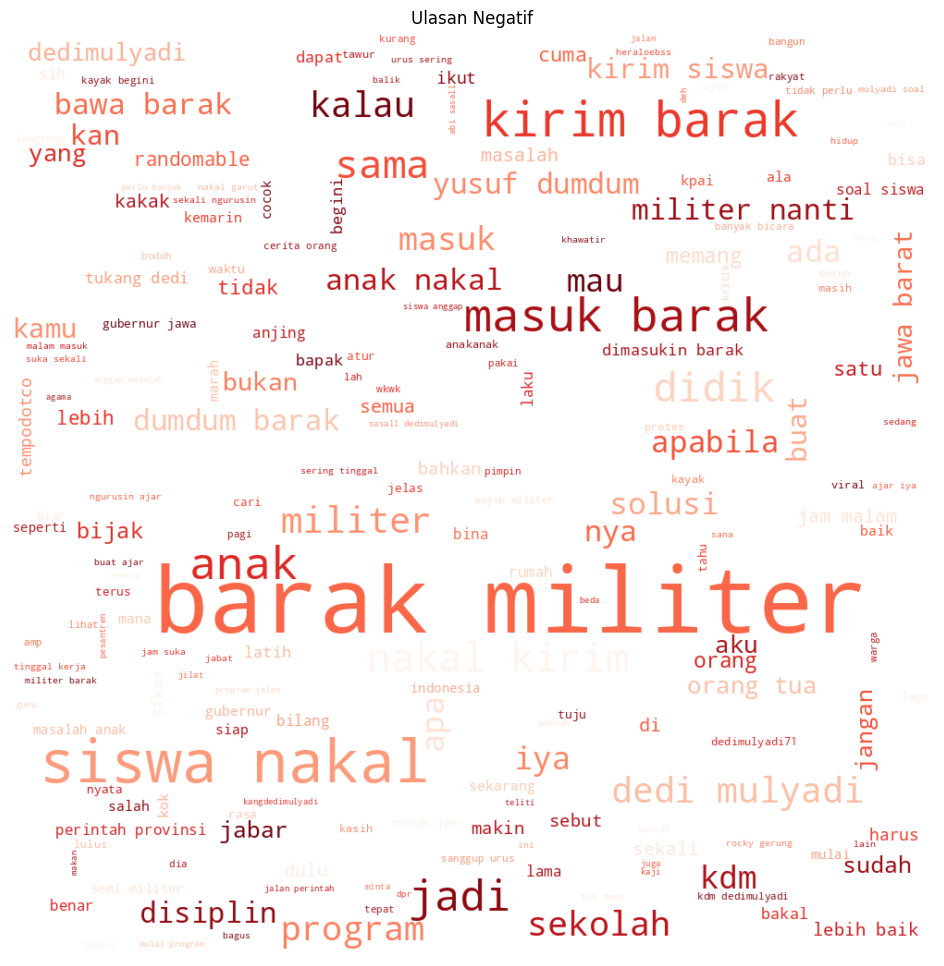

In [ ]:
all_text_s0 = ' '.join(word for word in train_s0["full_text"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(24, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Negatif")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
train_s1 = result[result["Label"] == 1]
train_s1["full_text"] = train_s1["full_text"].fillna("Tidak ada komentar")

/tmp/ipython-input-3823219861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["full_text"] = train_s1["full_text"].fillna("Tidak ada komentar")


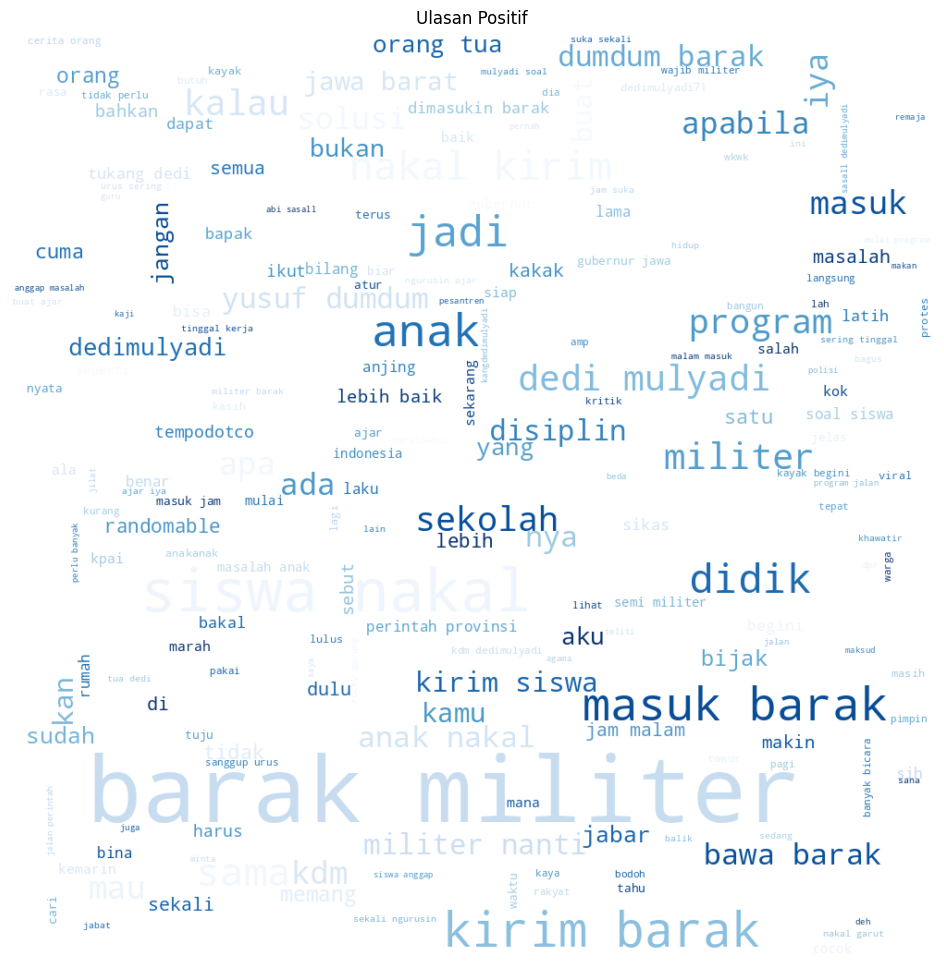

In [ ]:
all_text_s1 = ' '.join(word for word in train_s1["full_text"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(24, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
train_s2 = result[result["Label"] == 2]
train_s2["full_text"] = train_s2["full_text"].fillna("Tidak ada komentar")

/tmp/ipython-input-2147585198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s2["full_text"] = train_s2["full_text"].fillna("Tidak ada komentar")


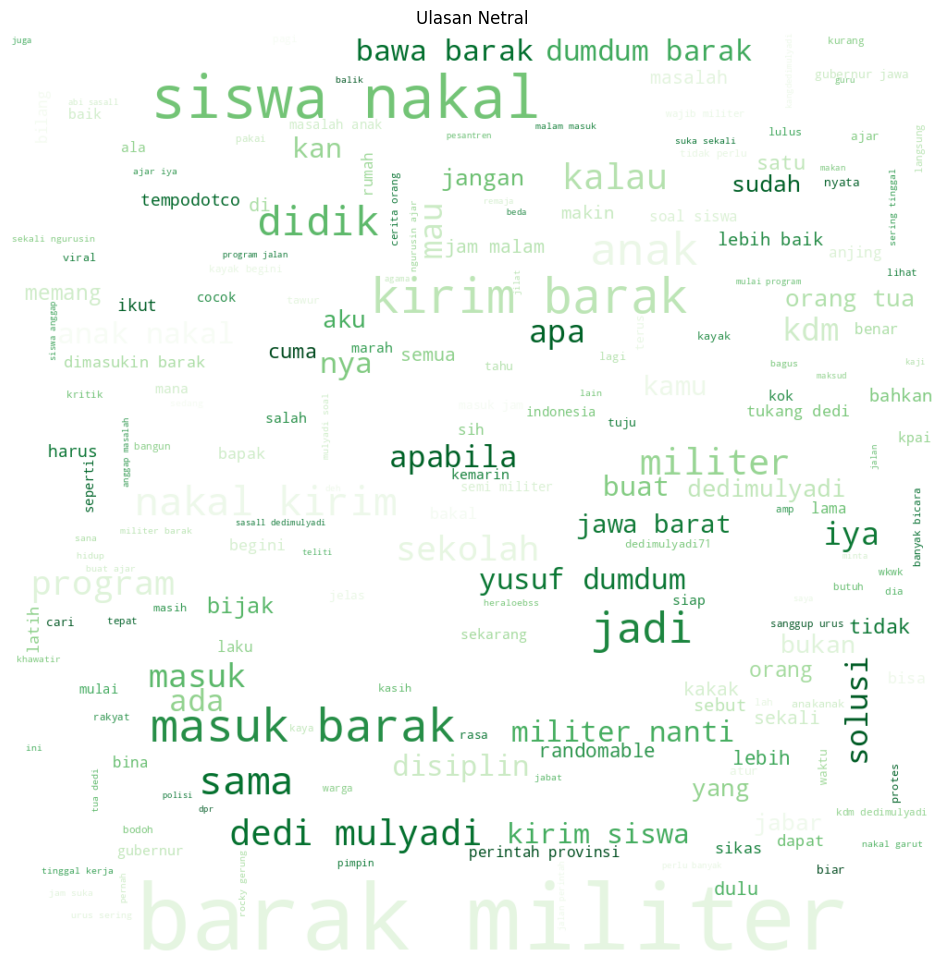

In [ ]:
all_text_s2 = ' '.join(word for word in train_s2["full_text"])
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(24, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Netral")
plt.margins(x=0, y=0)
plt.show()

## custom dataset


In [ ]:
# Dataset class
class CustomDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe['full_text']
        self.labels = dataframe['Label']
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text.iloc[index])
        text = " ".join(text.split())

        inputs = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            return_token_type_ids=True
        )

        return {
            'input_ids': inputs['input_ids'],
            'attention_mask': inputs['attention_mask'],
            'token_type_ids': inputs['token_type_ids'],
            'labels': int(self.labels.iloc[index])
        }

## split data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from transformers import BertTokenizer

# --- CONFIG ---
tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-uncased")
MAX_LEN = 128
BATCH_SIZE = 32
NUM_EPOCHS = 15

# === Split Train & Validation 80/20 ===
train_df, val_df = train_test_split(
    result,
    test_size=0.2,         # 20% untuk validasi
    random_state=42,
    stratify=result['Label']  # menjaga proporsi label seimbang
)

# === Buat Dataset ===
train_dataset = CustomDataset(train_df, tokenizer, MAX_LEN)
valid_dataset = CustomDataset(val_df, tokenizer, MAX_LEN)

# === Buat DataLoader ===
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"Train samples : {len(train_dataset)}")
print(f"Valid samples : {len(valid_dataset)}")


Train samples : 1478
Valid samples : 370


## set dataloader

In [ ]:
from transformers import DataCollatorWithPadding
from torch.utils.data import DataLoader

# --- DATASET & DATALOADER ---
train_dataset = CustomDataset(train_df, tokenizer, MAX_LEN)
val_dataset = CustomDataset(val_df, tokenizer, MAX_LEN)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,           # tetap shuffle untuk training
    collate_fn=data_collator
)

val_dataloader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,          # tidak perlu shuffle untuk validasi
    collate_fn=data_collator
)


## set model dan parameter training

In [ ]:
# --- MODEL & OPTIMIZER & SCHEDULER ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased", num_labels=3,  hidden_dropout_prob=0.3)

model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)



num_training_steps = NUM_EPOCHS * len(train_dataloader)

lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## training 

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in dataloader:
            # Pastikan semua tensor sudah di device yang benar
            batch = {k: v.to(device) for k, v in batch.items()}

            outputs = model(**batch)
            logits = outputs.logits

            preds = torch.argmax(logits, dim=1)  # langsung argmax tanpa softmax

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch['labels'].cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    return acc, f1


In [ ]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

best_f1 = 0
best_epoch = 0

train_losses, val_losses, val_accuracies, val_f1s = [], [], [], []

total_steps = NUM_EPOCHS * len(train_dataloader)
progress_bar = tqdm(total=total_steps, desc="Training")

for epoch in range(NUM_EPOCHS):
    model.train()
    total_train_loss = 0

    for batch in train_dataloader:
        batch = {
            k: (torch.tensor(v).to(device) if not isinstance(v, torch.Tensor) else v.to(device))
            for k, v in batch.items()
        }

        outputs = model(**batch)
        loss = outputs.loss
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        progress_bar.set_postfix({'epoch': epoch + 1, 'loss': loss.item()})
        progress_bar.update(1)

    avg_train_loss = total_train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)

    # Evaluation
    model.eval()
    total_val_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in val_dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            total_val_loss += loss.item()

            preds = torch.argmax(outputs.logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch['labels'].cpu().numpy())

    avg_val_loss = total_val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)

    val_acc = (torch.tensor(all_preds) == torch.tensor(all_labels)).float().mean().item()
    val_f1 = f1_score(all_labels, all_preds, average='weighted')

    val_accuracies.append(val_acc)
    val_f1s.append(val_f1)

    print(f"\nEpoch {epoch+1}/{NUM_EPOCHS} — "
          f"Train Loss: {avg_train_loss:.4f} | "
          f"Val Loss: {avg_val_loss:.4f} | "
          f"Val Accuracy: {val_acc:.4f} | F1 Score: {val_f1:.4f}")

    if val_f1 > best_f1:
        best_f1 = val_f1
        best_epoch = epoch
        torch.save(model.state_dict(), "best_model.pt")

progress_bar.close()
print(f"\nTraining selesai. Best F1: {best_f1:.4f} pada epoch {best_epoch+1}")


Training:   0%|          | 0/705 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Training:   7%|▋         | 47/705 [00:22<04:23,  2.50it/s, epoch=1, loss=1.02]


Epoch 1/15 — Train Loss: 1.0395 | Val Loss: 0.9271 | Val Accuracy: 0.5378 | F1 Score: 0.5012


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Training:  13%|█▎        | 94/705 [00:54<03:51,  2.64it/s, epoch=2, loss=1.08]


Epoch 2/15 — Train Loss: 0.8567 | Val Loss: 0.6835 | Val Accuracy: 0.7054 | F1 Score: 0.6900


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Training:  20%|██        | 141/705 [01:20<03:28,  2.71it/s, epoch=3, loss=0.481]


Epoch 3/15 — Train Loss: 0.6293 | Val Loss: 0.5423 | Val Accuracy: 0.7432 | F1 Score: 0.7399


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Training:  27%|██▋       | 188/705 [01:46<03:17,  2.62it/s, epoch=4, loss=0.242]


Epoch 4/15 — Train Loss: 0.5316 | Val Loss: 0.5094 | Val Accuracy: 0.7784 | F1 Score: 0.7679


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Training:  33%|███▎      | 235/705 [02:12<02:51,  2.73it/s, epoch=5, loss=0.234]


Epoch 5/15 — Train Loss: 0.4131 | Val Loss: 0.3648 | Val Accuracy: 0.8703 | F1 Score: 0.8694


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Training:  40%|████      | 282/705 [02:41<02:35,  2.72it/s, epoch=6, loss=0.117]


Epoch 6/15 — Train Loss: 0.4095 | Val Loss: 0.4391 | Val Accuracy: 0.8405 | F1 Score: 0.8352


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Training:  47%|████▋     | 329/705 [03:06<02:16,  2.76it/s, epoch=7, loss=0.136]


Epoch 7/15 — Train Loss: 0.3064 | Val Loss: 0.3631 | Val Accuracy: 0.8757 | F1 Score: 0.8710


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Training:  53%|█████▎    | 376/705 [03:35<02:03,  2.67it/s, epoch=8, loss=0.347]


Epoch 8/15 — Train Loss: 0.2606 | Val Loss: 0.3319 | Val Accuracy: 0.9000 | F1 Score: 0.8978


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Training:  60%|██████    | 423/705 [04:05<01:47,  2.62it/s, epoch=9, loss=0.347]


Epoch 9/15 — Train Loss: 0.2144 | Val Loss: 0.3060 | Val Accuracy: 0.9135 | F1 Score: 0.9122


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Training:  67%|██████▋   | 470/705 [04:34<01:28,  2.67it/s, epoch=10, loss=0.0626]


Epoch 10/15 — Train Loss: 0.1819 | Val Loss: 0.2965 | Val Accuracy: 0.9081 | F1 Score: 0.9064


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Training:  73%|███████▎  | 517/705 [04:58<01:08,  2.75it/s, epoch=11, loss=0.886]


Epoch 11/15 — Train Loss: 0.1766 | Val Loss: 0.3164 | Val Accuracy: 0.9162 | F1 Score: 0.9146


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Training:  80%|████████  | 564/705 [05:24<00:51,  2.75it/s, epoch=12, loss=0.0193]


Epoch 12/15 — Train Loss: 0.1938 | Val Loss: 0.3284 | Val Accuracy: 0.9162 | F1 Score: 0.9146


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Training:  87%|████████▋ | 611/705 [05:54<00:34,  2.73it/s, epoch=13, loss=0.0375]


Epoch 13/15 — Train Loss: 0.1307 | Val Loss: 0.3281 | Val Accuracy: 0.9189 | F1 Score: 0.9178


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Training:  93%|█████████▎| 658/705 [06:20<00:17,  2.67it/s, epoch=14, loss=0.104]


Epoch 14/15 — Train Loss: 0.1263 | Val Loss: 0.3097 | Val Accuracy: 0.9243 | F1 Score: 0.9233


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Training: 100%|██████████| 705/705 [06:48<00:00,  1.73it/s, epoch=15, loss=0.0791]


Epoch 15/15 — Train Loss: 0.1231 | Val Loss: 0.3198 | Val Accuracy: 0.9216 | F1 Score: 0.9205

Training selesai. Best F1: 0.9233 pada epoch 14


## visualisasi hasil training

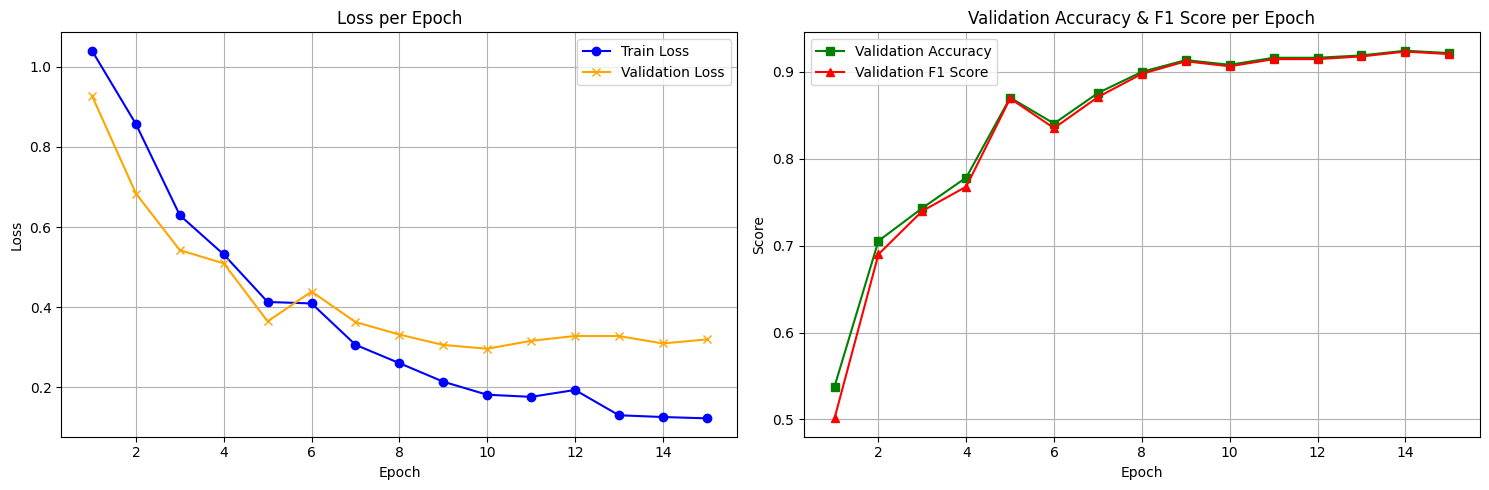

In [ ]:
# Visualisasi hasil training
epochs = range(1, NUM_EPOCHS + 1)

plt.figure(figsize=(15, 5))

# Grafik Train Loss dan Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, marker='o', color='blue', label='Train Loss')
plt.plot(epochs, val_losses, marker='x', color='orange', label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Grafik Validation Accuracy & F1 Score
plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, marker='s', color='green', label='Validation Accuracy')
plt.plot(epochs, val_f1s, marker='^', color='red', label='Validation F1 Score')
plt.title('Validation Accuracy & F1 Score per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## confusion matriks


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Validation Accuracy: 0.9243
Validation F1 Score (weighted): 0.9233

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.88       123
           1       0.95      1.00      0.98       123
           2       0.89      0.94      0.91       124

    accuracy                           0.92       370
   macro avg       0.93      0.92      0.92       370
weighted avg       0.93      0.92      0.92       370



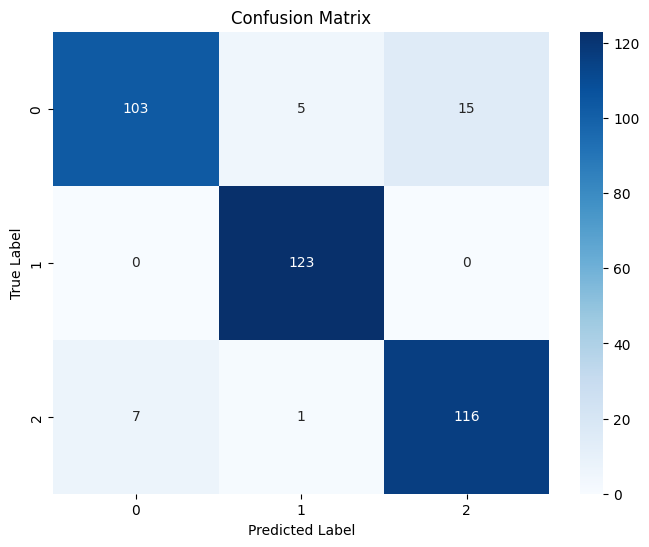

In [ ]:
import torch
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Muat model terbaik
model.load_state_dict(torch.load("best_model.pt"))
model.eval()

all_preds, all_labels = [], []

with torch.no_grad():
    for batch in val_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        preds = torch.argmax(outputs.logits, dim=-1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch['labels'].cpu().numpy())

# Hitung metrik
accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='weighted')
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation F1 Score (weighted): {f1:.4f}")

# Laporan klasifikasi per kelas
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))

# Confusion matrix visualisasi
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## save model

In [ ]:
import pickle

# Simpan keseluruhan model (bukan hanya state_dict) ke file .pkl
with open("best_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [ ]:
import torch
import pickle

MODEL_PATH = "/content/best_model.pkl"

# Load model di GPU dulu
with open(MODEL_PATH, "rb") as f:
    model = pickle.load(f)

# Pindahkan model ke CPU
model.to(torch.device("cpu"))

# Simpan ulang model dalam format CPU
with open("/content/saved_bitha_new.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model berhasil disimpan ulang untuk CPU!")


✅ Model berhasil disimpan ulang untuk CPU!


In [ ]:
import shutil

# Mount Google Drive (kalau belum)
from google.colab import drive
drive.mount('/content/drive')

# Salin file ke Drive
shutil.copy("/content/saved_bitha_new.pkl", "/content/drive/MyDrive/saved_bitha_new_smote.pkl")

print("✅ Model berhasil disalin ke Google Drive")


Mounted at /content/drive
✅ Model berhasil disalin ke Google Drive


## test data baru pada model

In [ ]:
import torch
import pickle
import pandas as pd
from transformers import BertTokenizer

# --- CONFIG ---
MODEL_PATH_CPU = "/content/saved_bitha_new.pkl"
MAX_LEN = 128
tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-uncased")

# === 1. Load model CPU ===
with open(MODEL_PATH_CPU, "rb") as f:
    model = pickle.load(f)

model.eval()  # mode evaluasi

# === 2. Siapkan 5 kalimat baru ===
new_sentences = [
    "Masuk barak Militer tak melulu keras seperti yang dibayangkan orang2 yang suka teriak HAM.",
    "Di saat perang, sipil jangan sampe ngatur urusan militer, dan pun dalam situasi damai militer nggak usah ngatur-ngatur urusan sipil. Itu yang kita minta, militer profesional. Urus urusannya sendiri. Jangan rusak demokrasi.  Kita gak lagi perang.",
    "Kebijakan pendisiplinan 272 siswa dengan pendekatan militeristik yang diinisiasi oleh Gubernur Jawa Barat, Dedi Mulyadi, tidak hanya melanggar hak anak, tetapi juga bertentangan dengan prinsip-prinsip dasar perlindungan anak dalam",
    "Komnas Ham Sebut TNI Tak Berwenang Didik Sipil, Minta Program Barak Militer Dievaluasi",
    "Anak bukan tentara. Barak bukan tempat belajar."
]

# === 3. Tokenisasi ===
encodings = tokenizer(
    new_sentences,
    add_special_tokens=True,
    max_length=MAX_LEN,
    truncation=True,
    padding="max_length",
    return_tensors="pt"
)

# === 4. Prediksi ===
with torch.no_grad():
    outputs = model(
        input_ids=encodings['input_ids'],
        attention_mask=encodings['attention_mask'],
        token_type_ids=encodings['token_type_ids']
    )

# Jika model BERT + classifier: ambil argmax
predictions = torch.argmax(outputs.logits, dim=1).numpy()

# === 5. Tampilkan hasil ===
for sent, pred in zip(new_sentences, predictions):
    print(f"Kalimat : {sent}")
    print(f"Prediksi Label : {pred}")
    print("-" * 50)


Kalimat : Masuk barak Militer tak melulu keras seperti yang dibayangkan orang2 yang suka teriak HAM.
Prediksi Label : 0
--------------------------------------------------
Kalimat : Di saat perang, sipil jangan sampe ngatur urusan militer, dan pun dalam situasi damai militer nggak usah ngatur-ngatur urusan sipil. Itu yang kita minta, militer profesional. Urus urusannya sendiri. Jangan rusak demokrasi.  Kita gak lagi perang.
Prediksi Label : 1
--------------------------------------------------
Kalimat : Kebijakan pendisiplinan 272 siswa dengan pendekatan militeristik yang diinisiasi oleh Gubernur Jawa Barat, Dedi Mulyadi, tidak hanya melanggar hak anak, tetapi juga bertentangan dengan prinsip-prinsip dasar perlindungan anak dalam
Prediksi Label : 2
--------------------------------------------------
Kalimat : Komnas Ham Sebut TNI Tak Berwenang Didik Sipil, Minta Program Barak Militer Dievaluasi
Prediksi Label : 2
--------------------------------------------------
Kalimat : Anak bukan tent